# Predict Soccer Players with Regression

![Data Science Workflow](img/ds-workflow.png)

## Goal of Project
- Make a model to predict players overall rating based on metrics
- This is a subset of the Kaggle dataset [European Soccer Database](https://www.kaggle.com/hugomathien/soccer)
    - A bigger project is to predict outcomes of games

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [32]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1.b: Read the data
- Use ```pd.read_parquet()``` to read the file `files/soccer.parquet`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected

In [2]:
data = pd.read_parquet('files/soccer.parquet')
data.head()

,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,,,,,,,,,,,,,,,,,,,,,
1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Step 1.c: Data size
- HINT: `len(data)`

In [22]:
len(data)

181265

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Inspect the data
- There are many metrics
- To keep it simple let's keep the numeric
    - HINT: find them with `.dtypes`
- You can select all columns of numeric data types as follows `.select_dtypes(include='number')`

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181265 entries, 1 to 183978
Data columns (total 37 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   player_fifa_api_id  181265 non-null  int64  
 1   player_api_id       181265 non-null  int64  
 2   overall_rating      181265 non-null  float64
 3   potential           181265 non-null  float64
 4   crossing            181265 non-null  float64
 5   finishing           181265 non-null  float64
 6   heading_accuracy    181265 non-null  float64
 7   short_passing       181265 non-null  float64
 8   volleys             181265 non-null  float64
 9   dribbling           181265 non-null  float64
 10  curve               181265 non-null  float64
 11  free_kick_accuracy  181265 non-null  float64
 12  long_passing        181265 non-null  float64
 13  ball_control        181265 non-null  float64
 14  acceleration        181265 non-null  float64
 15  sprint_speed        181265 non-nul

In [7]:
data = data.select_dtypes(include='number')

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isnull().any()```
- See how many have null values (Assuming `data` contains your data)
```Python
data.isnull().sum()/len(data)*100
```

In [12]:
data.isnull().sum()/len(data)*100

player_fifa_api_id    0.000000
player_api_id         0.000000
overall_rating        0.454402
potential             0.454402
crossing              0.454402
finishing             0.454402
heading_accuracy      0.454402
short_passing         0.454402
volleys               1.474633
dribbling             0.454402
curve                 1.474633
free_kick_accuracy    0.454402
long_passing          0.454402
ball_control          0.454402
acceleration          0.454402
sprint_speed          0.454402
agility               1.474633
reactions             0.454402
balance               1.474633
shot_power            0.454402
jumping               1.474633
stamina               0.454402
strength              0.454402
long_shots            0.454402
aggression            0.454402
interceptions         0.454402
positioning           0.454402
vision                1.474633
penalties             0.454402
marking               0.454402
standing_tackle       0.454402
sliding_tackle        1.474633
gk_divin

### Step 2.c: Drop missing data
- Remove rows with missing data
- HINT: `.dropna()`

In [14]:
data = data.dropna()

### Step 2.d: Visualize data
- Make a histogram of the `overall_rating`
- This gives you an understanding of the data
- What does it tell you?

<AxesSubplot:ylabel='Frequency'>

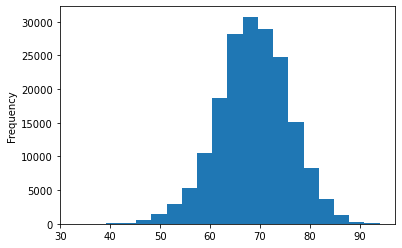

In [23]:
data['overall_rating'].plot.hist(bins=20)

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Feature and target selection
- The target data is given by `overall_rating`
- As we do not have a description of the date, let's learn a bit about it
    - HINT: Use `data.corr()['overall_rating'].sort_values(ascending=False)`
- For simplicity de-select features you do not thing should be part of the analysis
- Create DataFrames `X` and `y` containing the features and target, respectively.
    - HINT: To get all columns except one use `.drop(['overall_rating', <insert other here>], axis=1)`
    - HINT: Keep `y` as a DataFrame for simplicity later

In [38]:
data.corr()['overall_rating'].sort_values(ascending=False)

overall_rating        1.000000
reactions             0.770963
potential             0.765674
short_passing         0.458122
ball_control          0.444183
long_passing          0.434789
vision                0.431137
shot_power            0.427842
penalties             0.392717
long_shots            0.392660
positioning           0.369469
volleys               0.361470
curve                 0.357772
crossing              0.357655
dribbling             0.354369
free_kick_accuracy    0.349931
finishing             0.330116
stamina               0.326114
aggression            0.323084
strength              0.316421
heading_accuracy      0.313541
jumping               0.259023
sprint_speed          0.253333
interceptions         0.249475
acceleration          0.244180
agility               0.239896
standing_tackle       0.164780
balance               0.160364
marking               0.132857
sliding_tackle        0.128889
gk_kicking            0.028156
gk_diving             0.027215
gk_posit

In [39]:
X = data.drop(['overall_rating', 'potential'], axis=1)
y = data[['overall_rating']]

### Step 3.b: Divide into test and train
- We do this to test the accuracy of our model
- The idea is: We train on one dataset, then test on another to see how it performs
- To split dataset use
```Python
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
```
- The `random_state=42` is used for reproducability

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Step 3.c: Train the model
- Create a Linear Regression instance and fit it.
- HINT: Do this on train data (`X_train` and `y_train`)

In [41]:
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

### Step 3.d: Predict on test data
- Here we make predictions
- HINT: Use your model to predict `.predict(X_test)` and assign the result to `y_pred`

In [42]:
y_pred = lin.predict(X_test)

### Step 3.e: Evaluate the model
- Apply r-squared on the predicted results and the real results
- HINT: Use `r2_score` on `y_pred` and `y_test`

In [43]:
r2_score(y_pred, y_test)

0.7238386375726342

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present finding
- This is more a practice of creating a model
- But feel free to be creative
- An option could be to investigate the best indicator of a player

## Step 5: Actions
- Use insights
- Measure impact
- Main goal